In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
from plot_utils import *
import csv

models = [
    "gpt-4o",
    "claude-3-7-sonnet-20250219",
    "qwen2.5-7b-instruct",
    "qwen2.5-32b-instruct",
    "OpenThinker-7B",
    "OpenThinker-32B",
    ]
filenames = [
    f"../results/{model}_oed_direct_eig_by_obs.csv"
    for model in models
]

In [2]:
# read the csv file with csv.reader
data_list = []
for file_name in filenames:
    with open(file_name, 'r') as file:
        reader = csv.reader(file)
        data = list(reader)
        # remove the header row
        data = data[1:]
        data_list.append(data)


In [3]:
# only keep where col 2 is True
prior_data_list = [
    [d for d in data_list[i] if d[1] == "True"]
    for i in range(len(data_list))
]
no_prior_data_list = [
    [d for d in data_list[i] if d[1] == "False"]
    for i in range(len(data_list))
]

# average eig regret across models

In [4]:
errs_list = [np.mean([
    float(d[3]) for d in prior_data
]) for prior_data in prior_data_list]
stderrs_list = [np.mean([
    float(d[4]) for d in prior_data
])/np.sqrt(len(prior_data)*5) for prior_data in prior_data_list]

errs_no_prior_list = [np.mean([
    float(d[3]) for d in no_prior_data
]) for no_prior_data in no_prior_data_list]
stderrs_no_prior_list = [np.mean([
    float(d[4]) for d in no_prior_data
])/np.sqrt(len(no_prior_data)*5) for no_prior_data in no_prior_data_list]


In [5]:
errs_list

[np.float64(0.05576533207071203),
 np.float64(0.1083961125308962),
 np.float64(0.11983922514915442),
 np.float64(0.19372854413081522),
 np.float64(0.07056898379811018),
 np.float64(0.0809411488874508)]

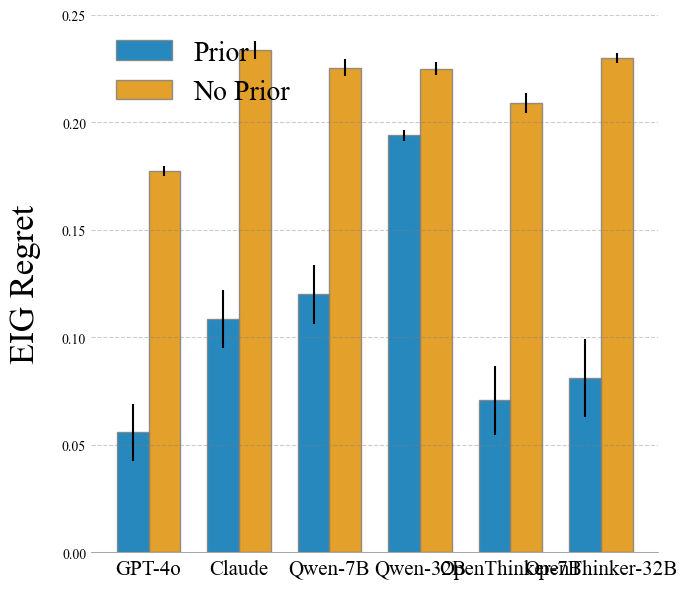

In [6]:
plot_bar(["GPT-4o", "Claude", "Qwen-7B", "Qwen-32B", "OpenThinker-7B", "OpenThinker-32B"], errs_list, stderrs_list, "Prior", errs_no_prior_list, stderrs_no_prior_list, "No Prior", xlabel="", ylabel="EIG Regret", title="", save_path="eireg.png", ylims=[0,0.25], width=0.35)

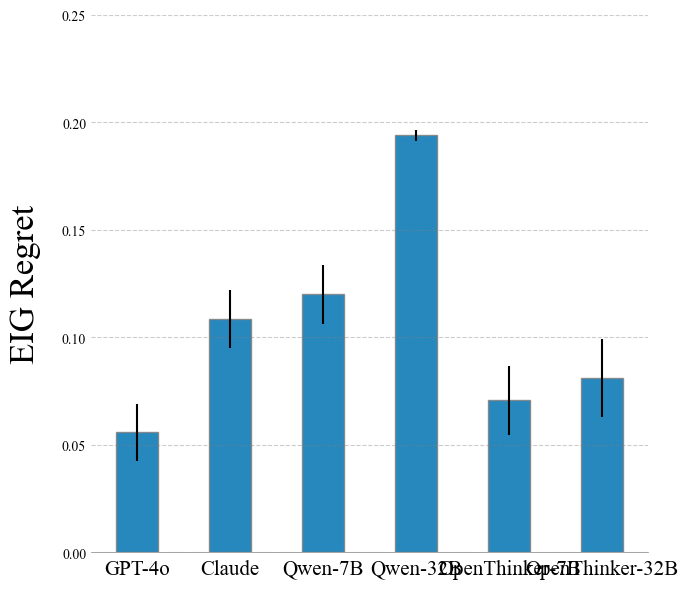

In [7]:
plot_bar(["GPT-4o", "Claude", "Qwen-7B", "Qwen-32B", "OpenThinker-7B", "OpenThinker-32B"], errs_list, stderrs_list, "Prior", None, stderrs_no_prior_list, "No Prior", xlabel="", ylabel="EIG Regret", title="", save_path="eireg1.png", ylims=[0,0.25], width=0.45)